# 📊 Lezione: Regressione Lineare Multipla per la Previsione delle Performance Studenti

## 🎯 Obiettivi della Lezione

In questa lezione imparerete:
- **Cos'è la Regressione Lineare Multipla** e quando utilizzarla
- Come **esplorare e preparare i dati** per il machine learning
- Come **costruire e valutare** un modello predittivo
- Come **interpretare i risultati** e l'importanza delle variabili
- Le **migliori pratiche** per progetti di Data Science

## 📋 Caso di Studio

**Problema**: Prevedere l'indice di performance degli studenti (Performance Index) basandosi su:
- ⏰ Ore di studio
- 📚 Punteggi precedenti  
- 🏃‍♂️ Attività extracurriculari
- 😴 Ore di sonno
- 📝 Numero di test di pratica

**Tipo di Problema**: Regressione (previsione di valori continui)
**Algoritmo**: Regressione Lineare Multipla

## 📚 Sezione 1: Importazione delle Librerie

Prima di iniziare qualsiasi progetto di Data Science, dobbiamo importare le librerie necessarie. Ogni libreria ha un ruolo specifico:

- **pandas**: Manipolazione e analisi dei dati (DataFrame, lettura CSV, ecc.)
- **numpy**: Calcoli numerici e operazioni su array
- **matplotlib**: Creazione di grafici e visualizzazioni
- **seaborn**: Visualizzazioni statistiche avanzate e più eleganti
- **sklearn**: Machine Learning (modelli, preprocessing, metriche, ecc.)

> 💡 **Tip**: È una buona pratica importare tutte le librerie all'inizio del progetto per avere una visione chiara delle dipendenze.

In [6]:
# Librerie per manipolazione dati
import pandas as pd           # Analisi e manipolazione dati strutturati
import numpy as np           # Calcoli numerici e operazioni matematiche

# Librerie per visualizzazione
import matplotlib.pyplot as plt  # Creazione di grafici base
import seaborn as sns           # Visualizzazioni statistiche avanzate

# Librerie per Machine Learning
from sklearn.model_selection import train_test_split  # Divisione dataset train/test
from sklearn.compose import ColumnTransformer         # Preprocessing colonne diverse
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # Encoding e scaling
from sklearn.pipeline import Pipeline                 # Creazione pipeline ML
from sklearn.linear_model import LinearRegression     # Modello di regressione lineare
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  # Metriche

# Configurazione per grafici più belli
plt.style.use('default')
sns.set_palette("husl")

print("✅ Tutte le librerie importate con successo!")
print("Ora siamo pronti per iniziare l'analisi dei dati.")

✅ Tutte le librerie importate con successo!
Ora siamo pronti per iniziare l'analisi dei dati.


## 🔍 Sezione 2: Caricamento e Esplorazione Iniziale dei Dati

**Perché è importante l'esplorazione iniziale?**
- 📊 Comprendere la **struttura** e **dimensioni** del dataset
- 🔍 Identificare **valori mancanti** o **anomalie**
- 📈 Avere una **prima impressione** sui dati
- 🧐 Verificare che il dataset sia **corretto** e **completo**

### Step dell'esplorazione:
1. **Caricamento** del dataset
2. **Dimensioni** del dataset (righe × colonne)
3. **Prime righe** per vedere la struttura
4. **Informazioni sui tipi** di dati
5. **Statistiche descrittive** 
6. **Controllo valori mancanti**

In [7]:
# Caricamento del dataset
print("🔄 Caricamento del dataset...")
df = pd.read_csv("/home/giovanni/Programs/Python3/DataAnalyst-course/Esercizi/Giorno 12/Student_Performance.csv")

# 1. Dimensioni del dataset
print(f"📏 Dimensioni del dataset: {df.shape[0]} righe × {df.shape[1]} colonne")
print(f"   → Abbiamo {df.shape[0]} studenti con {df.shape[1]} caratteristiche ciascuno")

print("\n" + "="*60)
print("📋 PRIME 5 RIGHE DEL DATASET")
print("="*60)
# 2. Prime righe per vedere la struttura
display(df.head())

print("\n" + "="*60)
print("ℹ️  INFORMAZIONI SUL DATASET")
print("="*60)
# 3. Informazioni sui tipi di dati
df.info()

print("\n" + "="*60)
print("📊 STATISTICHE DESCRITTIVE")
print("="*60)
# 4. Statistiche descrittive delle variabili numeriche
display(df.describe())

print("\n" + "="*60)
print("❓ CONTROLLO VALORI MANCANTI")
print("="*60)
# 5. Verifica valori mancanti
valori_mancanti = df.isnull().sum()
print("Valori mancanti per colonna:")
for colonna, numero in valori_mancanti.items():
    if numero > 0:
        print(f"  ❌ {colonna}: {numero} valori mancanti")
    else:
        print(f"  ✅ {colonna}: nessun valore mancante")
        
if valori_mancanti.sum() == 0:
    print("\n🎉 Ottimo! Il dataset non ha valori mancanti.")
else:
    print(f"\n⚠️  Attenzione: {valori_mancanti.sum()} valori mancanti totali da gestire.")

🔄 Caricamento del dataset...
📏 Dimensioni del dataset: 10000 righe × 6 colonne
   → Abbiamo 10000 studenti con 6 caratteristiche ciascuno

📋 PRIME 5 RIGHE DEL DATASET


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0



ℹ️  INFORMAZIONI SUL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB

📊 STATISTICHE DESCRITTIVE


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000



❓ CONTROLLO VALORI MANCANTI
Valori mancanti per colonna:
  ✅ Hours Studied: nessun valore mancante
  ✅ Previous Scores: nessun valore mancante
  ✅ Extracurricular Activities: nessun valore mancante
  ✅ Sleep Hours: nessun valore mancante
  ✅ Sample Question Papers Practiced: nessun valore mancante
  ✅ Performance Index: nessun valore mancante

🎉 Ottimo! Il dataset non ha valori mancanti.


## 📈 Sezione 3: Analisi Esplorativa dei Dati (EDA)

**Perché fare l'Analisi Esplorativa?**
- 🔍 **Scoprire pattern** e relazioni nei dati
- 📊 **Visualizzare la distribuzione** delle variabili
- 🔗 **Identificare correlazioni** tra variabili
- 🎯 **Comprendere la variabile target** che vogliamo prevedere
- ⚠️  **Individuare outlier** o anomalie

### Grafici che creeremo:
1. **Istogramma** della variabile target (Performance Index)
2. **Matrice di correlazione** tra tutte le variabili numeriche
3. **Boxplot** per confrontare categorie vs performance
4. **Scatter plot** per visualizzare relazioni lineari

> 💡 **Ricorda**: L'EDA è fondamentale per capire i dati prima di costruire il modello!

🎨 Creazione visualizzazioni per l'analisi esplorativa...


/home/giovanni/Programs/Python3/DataAnalyst-course/.venv/lib/python3.13/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/tmp/ipykernel_52047/1400370278.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Extracurricular Activities', y='Performance Index',
/tmp/ipykernel_52047/1400370278.py:64: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_52047/1400370278.py:64: UserWarning: Glyph 127939 (\N{RUNNER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_52047/1400370278.py:64: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_52047/1400370278.py:64: UserWarning: Glyph 128218 (\N{BOOKS}) missing from 

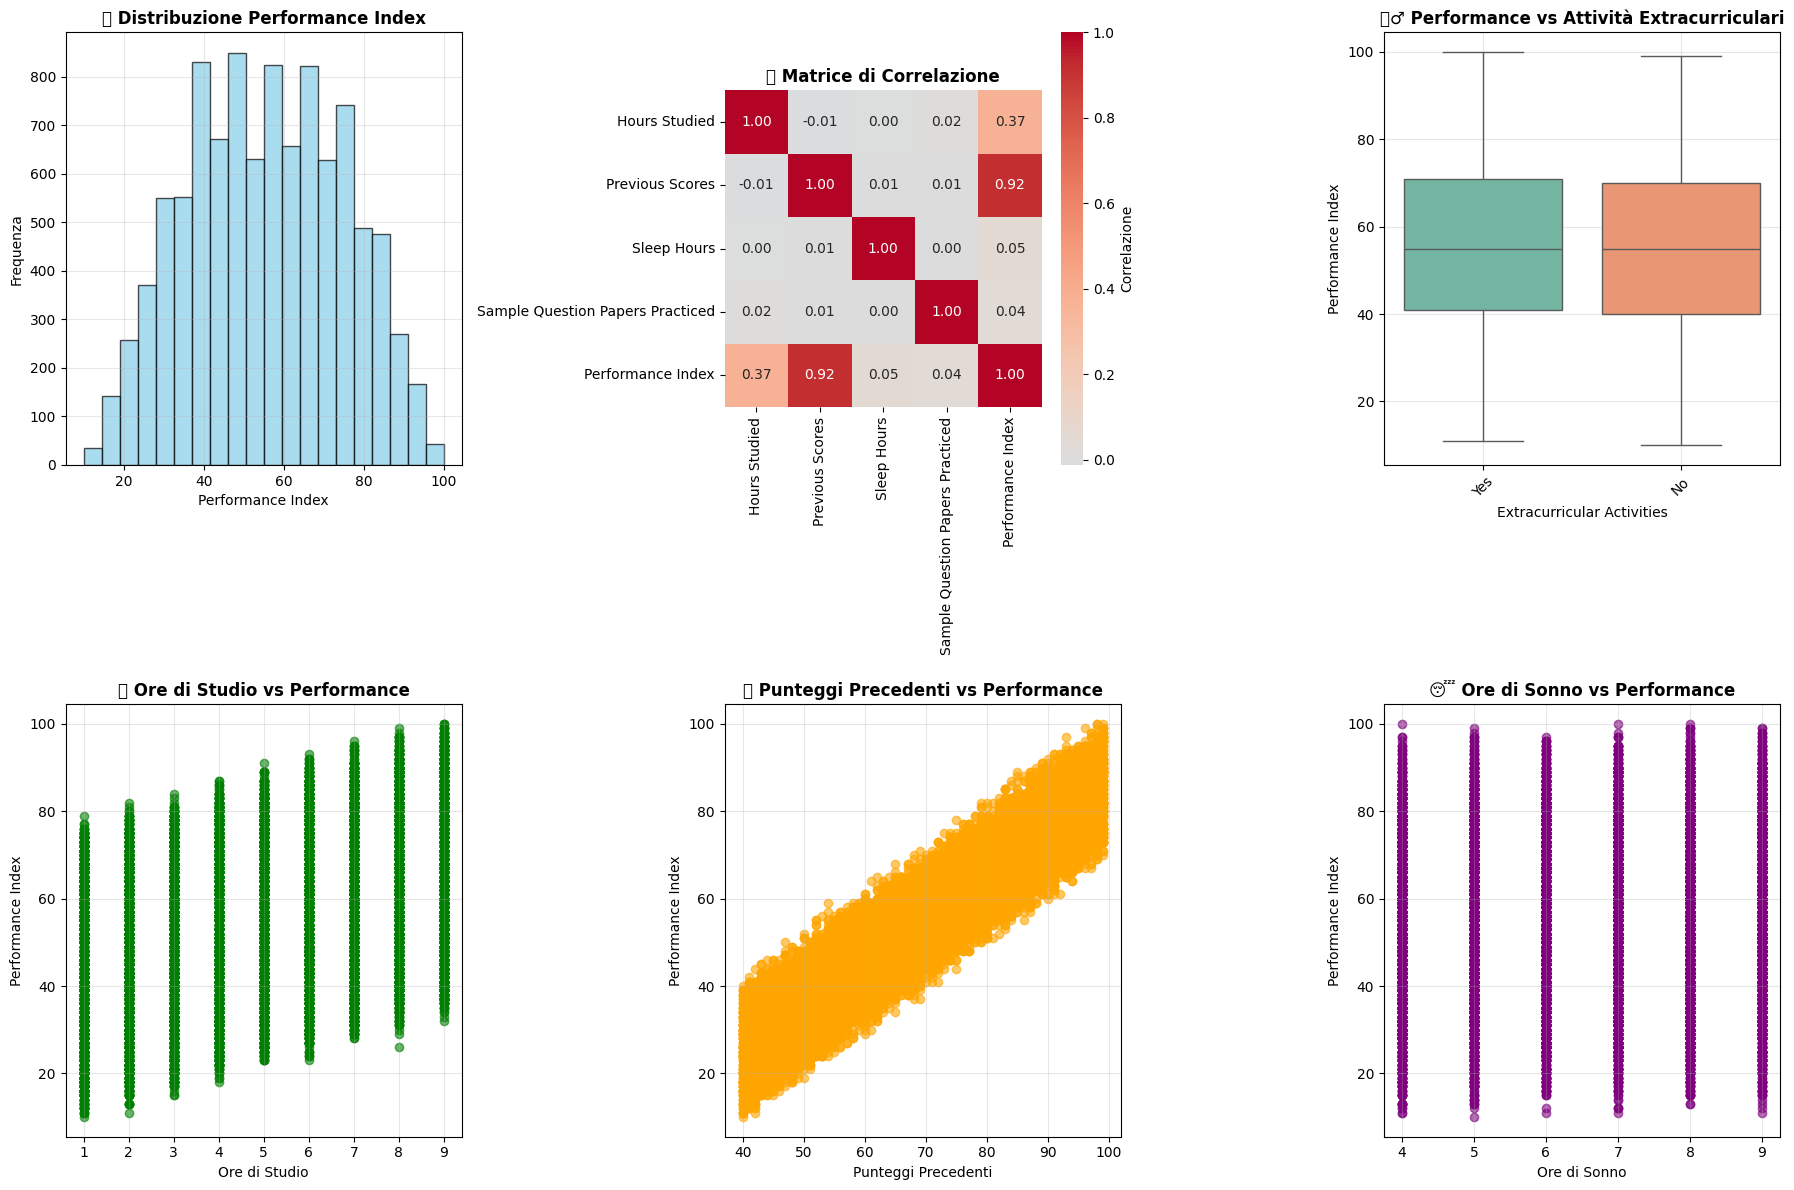


🔍 ANALISI DELLE CORRELAZIONI PIÙ FORTI
Correlazioni con Performance Index (ordinate per forza):
  📈 Previous Scores: 0.915 (correlazione forte)
  📈 Hours Studied: 0.374 (correlazione debole)

💡 Interpretazione:
   • Correlazione vicina a +1: relazione positiva forte
   • Correlazione vicina a -1: relazione negativa forte
   • Correlazione vicina a 0: nessuna relazione lineare


In [8]:
# Creiamo una figura con 6 sottografici per l'analisi esplorativa
plt.figure(figsize=(18, 12))

print("🎨 Creazione visualizzazioni per l'analisi esplorativa...")

# 1. DISTRIBUZIONE DELLA VARIABILE TARGET
plt.subplot(2, 3, 1)
plt.hist(df['Performance Index'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('📊 Distribuzione Performance Index', fontsize=12, fontweight='bold')
plt.xlabel('Performance Index')
plt.ylabel('Frequenza')
plt.grid(True, alpha=0.3)

# 2. MATRICE DI CORRELAZIONE
plt.subplot(2, 3, 2)
# Selezioniamo solo le colonne numeriche per la correlazione
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Creiamo la heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'label': 'Correlazione'})
plt.title('🔗 Matrice di Correlazione', fontsize=12, fontweight='bold')

# 3. BOXPLOT PER VARIABILI CATEGORICHE
categorical_cols = df.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    plt.subplot(2, 3, 3)
    if 'Extracurricular Activities' in df.columns:
        sns.boxplot(data=df, x='Extracurricular Activities', y='Performance Index', 
                   palette='Set2')
        plt.title('🏃‍♂️ Performance vs Attività Extracurriculari', fontsize=12, fontweight='bold')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)

# 4. SCATTER PLOT: ORE DI STUDIO vs PERFORMANCE
if 'Hours Studied' in df.columns:
    plt.subplot(2, 3, 4)
    plt.scatter(df['Hours Studied'], df['Performance Index'], alpha=0.6, color='green')
    plt.xlabel('Ore di Studio')
    plt.ylabel('Performance Index')
    plt.title('⏰ Ore di Studio vs Performance', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)

# 5. SCATTER PLOT: PUNTEGGI PRECEDENTI vs PERFORMANCE
if 'Previous Scores' in df.columns:
    plt.subplot(2, 3, 5)
    plt.scatter(df['Previous Scores'], df['Performance Index'], alpha=0.6, color='orange')
    plt.xlabel('Punteggi Precedenti')
    plt.ylabel('Performance Index')
    plt.title('📚 Punteggi Precedenti vs Performance', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)

# 6. SCATTER PLOT: ORE DI SONNO vs PERFORMANCE
if 'Sleep Hours' in df.columns:
    plt.subplot(2, 3, 6)
    plt.scatter(df['Sleep Hours'], df['Performance Index'], alpha=0.6, color='purple')
    plt.xlabel('Ore di Sonno')
    plt.ylabel('Performance Index')
    plt.title('😴 Ore di Sonno vs Performance', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analizziamo le correlazioni più forti
print("\n" + "="*60)
print("🔍 ANALISI DELLE CORRELAZIONI PIÙ FORTI")
print("="*60)

# Troviamo le correlazioni con Performance Index (escludendo l'autocorrelazione)
correlazioni_target = correlation_matrix['Performance Index'].drop('Performance Index').sort_values(key=abs, ascending=False)

print("Correlazioni con Performance Index (ordinate per forza):")
for variabile, correlazione in correlazioni_target.items():
    if abs(correlazione) > 0.3:  # Solo correlazioni significative
        emoji = "📈" if correlazione > 0 else "📉"
        forza = "forte" if abs(correlazione) > 0.7 else "moderata" if abs(correlazione) > 0.5 else "debole"
        print(f"  {emoji} {variabile}: {correlazione:.3f} (correlazione {forza})")
    
print(f"\n💡 Interpretazione:")
print(f"   • Correlazione vicina a +1: relazione positiva forte")
print(f"   • Correlazione vicina a -1: relazione negativa forte") 
print(f"   • Correlazione vicina a 0: nessuna relazione lineare")

## 🛠️ Sezione 4: Preparazione dei Dati per il Modello

**Perché preparare i dati?**
- 🤖 I modelli di **Machine Learning lavorano solo con numeri**
- ⚖️ Le variabili devono essere sulla **stessa scala**
- 🎯 Dobbiamo separare **target** (quello che vogliamo prevedere) da **features** (predittori)

### Concetti chiave:

**🎯 Target (y)**: La variabile che vogliamo prevedere (Performance Index)

**📊 Features (X)**: Le variabili che usiamo per fare la previsione (ore studio, punteggi, ecc.)

**📝 Variabili Categoriche**: Testo ("Yes"/"No") → vanno trasformate in numeri

**🔢 Variabili Numeriche**: Già numeri, ma potrebbero aver bisogno di standardizzazione

> 💡 **Importante**: Questa separazione è fondamentale per qualsiasi progetto di ML!

In [9]:
print("🔧 PREPARAZIONE DEI DATI PER IL MODELLO")
print("="*60)

# 1. SEPARAZIONE TARGET E FEATURES
print("1️⃣ Separazione target e features...")

# Target: quello che vogliamo prevedere
y = df["Performance Index"]
print(f"   🎯 Target (y): Performance Index")
print(f"      → Tipo: {y.dtype}")
print(f"      → Range: {y.min():.1f} - {y.max():.1f}")

# Features: tutte le altre colonne (predittori)
X = df.drop("Performance Index", axis=1)
print(f"   📊 Features (X): {X.shape[1]} variabili predittive")
print(f"      → Colonne: {list(X.columns)}")

print("\n2️⃣ Identificazione tipi di variabili...")

# 2. IDENTIFICAZIONE VARIABILI CATEGORICHE E NUMERICHE
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
numeric_features = X.select_dtypes(exclude=["object"]).columns.tolist()

print(f"   📝 Variabili CATEGORICHE ({len(categorical_features)}):")
for cat in categorical_features:
    valori_unici = X[cat].unique()
    print(f"      • {cat}: {valori_unici} ({len(valori_unici)} categorie)")

print(f"\n   🔢 Variabili NUMERICHE ({len(numeric_features)}):")
for num in numeric_features:
    range_val = f"{X[num].min():.1f} - {X[num].max():.1f}"
    print(f"      • {num}: range {range_val}")

print("\n3️⃣ Anteprima della separazione...")
print("Target (y) - Prime 5 osservazioni:")
print(y.head())

print("\nFeatures (X) - Prime 5 righe:")
display(X.head())

print("\n✅ Dati preparati per il preprocessing!")
print(f"   → {len(y)} osservazioni")
print(f"   → {len(categorical_features)} variabili categoriche da codificare")
print(f"   → {len(numeric_features)} variabili numeriche da standardizzare")

🔧 PREPARAZIONE DEI DATI PER IL MODELLO
1️⃣ Separazione target e features...
   🎯 Target (y): Performance Index
      → Tipo: float64
      → Range: 10.0 - 100.0
   📊 Features (X): 5 variabili predittive
      → Colonne: ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']

2️⃣ Identificazione tipi di variabili...
   📝 Variabili CATEGORICHE (1):
      • Extracurricular Activities: ['Yes' 'No'] (2 categorie)

   🔢 Variabili NUMERICHE (4):
      • Hours Studied: range 1.0 - 9.0
      • Previous Scores: range 40.0 - 99.0
      • Sleep Hours: range 4.0 - 9.0
      • Sample Question Papers Practiced: range 0.0 - 9.0

3️⃣ Anteprima della separazione...
Target (y) - Prime 5 osservazioni:
0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

Features (X) - Prime 5 righe:


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5



✅ Dati preparati per il preprocessing!
   → 10000 osservazioni
   → 1 variabili categoriche da codificare
   → 4 variabili numeriche da standardizzare


## ⚙️ Sezione 5: Creazione Pipeline di Pre-Processing

**Cos'è una Pipeline?**
- 🔄 Una **sequenza automatica** di trasformazioni sui dati
- 🛡️ **Evita errori** manuali e garantisce consistenza
- 🚀 **Semplifica** il flusso di lavoro
- ♻️ **Riutilizzabile** su nuovi dati

### Trasformazioni che applicheremo:

**📝 OneHotEncoder** per variabili categoriche:
- Trasforma "Yes"/"No" in colonne binarie (0/1)
- `drop='first'` evita ridondanza (problema multicollinearità)

**📊 StandardScaler** per variabili numeriche:
- Porta tutte le variabili a **media=0** e **deviazione standard=1**
- Evita che variabili con scale diverse dominino il modello

> 💡 **Esempio**: Se ho "Age" (0-100) e "Income" (0-100000), senza scaling l'Income dominerebbe!

In [10]:
print("🏗️ CREAZIONE PIPELINE DI PRE-PROCESSING")
print("="*60)

# 1. CREAZIONE DEL PREPROCESSOR
print("1️⃣ Configurazione delle trasformazioni...")

# ColumnTransformer: applica trasformazioni diverse a colonne diverse
preprocessor = ColumnTransformer(
    transformers=[
        # Per variabili categoriche: OneHotEncoder
        ("cat", OneHotEncoder(drop="first", sparse_output=False), categorical_features),
        
        # Per variabili numeriche: StandardScaler  
        ("num", StandardScaler(), numeric_features),
    ],
    remainder='drop'  # Ignora colonne non specificate
)

print("   📝 OneHotEncoder configurato per variabili categoriche:")
print(f"      → Colonne: {categorical_features}")
print(f"      → drop='first': evita multicollinearità")
print(f"      → sparse_output=False: output come array normale")

print(f"\n   📊 StandardScaler configurato per variabili numeriche:")
print(f"      → Colonne: {numeric_features}")
print(f"      → Trasforma a media=0, std=1")

# 2. CREAZIONE DELLA PIPELINE COMPLETA
print("\n2️⃣ Creazione pipeline completa (preprocessing + modello)...")

# Pipeline: preprocessor + modello di machine learning
model = Pipeline([
    ("preprocessor", preprocessor),        # Step 1: Preprocessing
    ("regressor", LinearRegression())      # Step 2: Modello di regressione
])

print("   🔄 Pipeline creata con 2 step:")
print("      Step 1: Preprocessor (OneHot + Scaling)")
print("      Step 2: LinearRegression")

# 3. VISUALIZZAZIONE DELLA PIPELINE
print("\n3️⃣ Struttura della pipeline:")
print(f"   Pipeline(steps=[")
print(f"       ('preprocessor', ColumnTransformer(...)),")
print(f"       ('regressor', LinearRegression())")
print(f"   ])")

print("\n✅ Pipeline di preprocessing creata con successo!")
print("\n🧠 Cosa succede quando usiamo la pipeline:")
print("   1. I dati passano prima al preprocessor")
print("   2. Variabili categoriche → OneHot encoding")
print("   3. Variabili numeriche → Standardizzazione")
print("   4. Dati trasformati → Modello di regressione")
print("   5. Output → Previsioni finali")

🏗️ CREAZIONE PIPELINE DI PRE-PROCESSING
1️⃣ Configurazione delle trasformazioni...
   📝 OneHotEncoder configurato per variabili categoriche:
      → Colonne: ['Extracurricular Activities']
      → drop='first': evita multicollinearità
      → sparse_output=False: output come array normale

   📊 StandardScaler configurato per variabili numeriche:
      → Colonne: ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
      → Trasforma a media=0, std=1

2️⃣ Creazione pipeline completa (preprocessing + modello)...
   🔄 Pipeline creata con 2 step:
      Step 1: Preprocessor (OneHot + Scaling)
      Step 2: LinearRegression

3️⃣ Struttura della pipeline:
   Pipeline(steps=[
       ('preprocessor', ColumnTransformer(...)),
       ('regressor', LinearRegression())
   ])

✅ Pipeline di preprocessing creata con successo!

🧠 Cosa succede quando usiamo la pipeline:
   1. I dati passano prima al preprocessor
   2. Variabili categoriche → OneHot encoding
   3. Varia

## 🚀 Sezione 6: Addestramento e Valutazione del Modello

**Perché dividere Train/Test?**
- 🧠 **Training Set**: Il modello "impara" da questi dati
- 🧪 **Test Set**: Valutiamo quanto bene il modello generalizza su dati mai visti
- 🚫 **NO DATA LEAKAGE**: Il test set deve essere completamente ignoto durante l'addestramento

### Metriche di Valutazione per la Regressione:

**📊 R² (R-quadrato)**:
- Range: 0-1 (più alto = migliore)
- Indica **quanto % della varianza** è spiegata dal modello
- R² = 0.8 → Il modello spiega l'80% della variabilità

**📏 MAE (Mean Absolute Error)**:
- Errore medio in **valore assoluto**
- Più basso = migliore
- Stessa unità della variabile target

**🎯 RMSE (Root Mean Squared Error)**:
- Penalizza di più gli **errori grandi**
- Più basso = migliore
- Più sensibile agli outlier rispetto al MAE

In [19]:
print("🎯 ADDESTRAMENTO E VALUTAZIONE DEL MODELLO")
print("="*60)

# 1. DIVISIONE TRAIN/TEST
print("1️⃣ Divisione del dataset in Training e Test...")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% per il test, 80% per il training
    random_state=42,      # Per risultati riproducibili
    stratify=None         # Non necessaria per la regressione
)

print(f"   📚 Training Set: {X_train.shape[0]} campioni ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   🧪 Test Set: {X_test.shape[0]} campioni ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"   ✅ Divisione completata!")

# 2. ADDESTRAMENTO DEL MODELLO
print("\n2️⃣ Addestramento del modello...")

# Addestriamo la pipeline completa sui dati di training
model.fit(X_train, y_train)

print("   🧠 Modello addestrato con successo!")
print("   📊 Il modello ha imparato le relazioni tra features e target")

# 3. PREVISIONI
print("\n3️⃣ Generazione delle previsioni...")

# Previsioni sui dati di training
y_train_pred = model.predict(X_train)
print(f"   📈 Previsioni su Training Set: {len(y_train_pred)} valori")

# Previsioni sui dati di test
y_test_pred = model.predict(X_test)
print(f"   🔍 Previsioni su Test Set: {len(y_test_pred)} valori")

# 4. CALCOLO DELLE METRICHE
print("\n4️⃣ Calcolo metriche di performance...")

# Metriche sul Training Set
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred)**0.5

# Metriche sul Test Set  
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred)**0.5

# 5. PRESENTAZIONE DEI RISULTATI
print("\n" + "="*50)
print("📊 RISULTATI DEL MODELLO")
print("="*50)

print(f"🏋️‍♂️ TRAINING SET:")
print(f"   R²   : {r2_train:.4f} ({r2_train*100:.1f}% della varianza spiegata)")
print(f"   MAE  : {mae_train:.3f} punti di errore medio")
print(f"   RMSE : {rmse_train:.3f} punti (penalizza errori grandi)")

print(f"\n🧪 TEST SET (performance su dati mai visti):")
print(f"   R²   : {r2_test:.4f} ({r2_test*100:.1f}% della varianza spiegata)")
print(f"   MAE  : {mae_test:.3f} punti di errore medio")
print(f"   RMSE : {rmse_test:.3f} punti (penalizza errori grandi)")

# 6. INTERPRETAZIONE AUTOMATICA
print(f"\n🎯 INTERPRETAZIONE:")
if abs(r2_train - r2_test) < 0.05:
    print(f"   ✅ Buona generalizzazione (differenza R² train-test: {abs(r2_train-r2_test):.3f})")
else:
    print(f"   ⚠️  Possibile overfitting (differenza R² train-test: {abs(r2_train-r2_test):.3f})")

if r2_test > 0.8:
    print(f"   🌟 Ottima capacità predittiva!")
elif r2_test > 0.6:
    print(f"   👍 Buona capacità predittiva")
elif r2_test > 0.4:
    print(f"   🤔 Capacità predittiva moderata")
else:
    print(f"   ❌ Capacità predittiva limitata")

print(f"   💡 In media sbagliamo di {mae_test:.1f} punti nelle previsioni")

🎯 ADDESTRAMENTO E VALUTAZIONE DEL MODELLO
1️⃣ Divisione del dataset in Training e Test...
   📚 Training Set: 8000 campioni (80.0%)
   🧪 Test Set: 2000 campioni (20.0%)
   ✅ Divisione completata!

2️⃣ Addestramento del modello...
   🧠 Modello addestrato con successo!
   📊 Il modello ha imparato le relazioni tra features e target

3️⃣ Generazione delle previsioni...
   📈 Previsioni su Training Set: 8000 valori
   🔍 Previsioni su Test Set: 2000 valori

4️⃣ Calcolo metriche di performance...

📊 RISULTATI DEL MODELLO
🏋️‍♂️ TRAINING SET:
   R²   : 0.9887 (98.9% della varianza spiegata)
   MAE  : 1.619 punti di errore medio
   RMSE : 2.042 punti (penalizza errori grandi)

🧪 TEST SET (performance su dati mai visti):
   R²   : 0.9890 (98.9% della varianza spiegata)
   MAE  : 1.611 punti di errore medio
   RMSE : 2.021 punti (penalizza errori grandi)

🎯 INTERPRETAZIONE:
   ✅ Buona generalizzazione (differenza R² train-test: 0.000)
   🌟 Ottima capacità predittiva!
   💡 In media sbagliamo di 1.6 p

## 🔍 Sezione 7: Analisi dell'Importanza delle Variabili

**Cos'è un Coefficiente nella Regressione Lineare?**

La regressione lineare multipla crea un'equazione del tipo:
```
Performance = β₀ + β₁×Hours_Studied + β₂×Previous_Scores + β₃×Sleep_Hours + ...
```

### Interpretazione dei Coefficienti:

**🔢 Valore del Coefficiente**:
- **Positivo** (+): ↗️ Se la variabile aumenta, il target aumenta
- **Negativo** (-): ↘️ Se la variabile aumenta, il target diminuisce
- **Vicino a 0**: 🤷‍♂️ La variabile ha poco impatto

**📏 Magnitudine (valore assoluto)**:
- **Grande**: 💪 Variabile molto influente
- **Piccola**: 🤏 Variabile poco influente

**🏠 Intercetta (β₀)**:
- Valore del target quando **tutte le features = 0**

> ⚠️ **Attenzione**: I coefficienti sono interpretabili solo se le variabili sono standardizzate!

In [12]:
print("🔬 ANALISI DELL'IMPORTANZA DELLE VARIABILI")
print("="*60)

# 1. ESTRAZIONE DEI COEFFICIENTI
print("1️⃣ Estrazione coefficienti dal modello addestrato...")

# Otteniamo i nomi delle features dopo il preprocessing
feature_names = model.named_steps["preprocessor"].get_feature_names_out()
print(f"   📋 Numero totale di features dopo preprocessing: {len(feature_names)}")

# Coefficienti del modello di regressione lineare
coefficients = model.named_steps["regressor"].coef_
print(f"   🔢 Numero di coefficienti estratti: {len(coefficients)}")

# Intercetta del modello
intercept = model.named_steps["regressor"].intercept_
print(f"   🏠 Intercetta del modello: {intercept:.4f}")

# 2. CREAZIONE DATAFRAME PER ANALISI
print("\n2️⃣ Organizzazione dei coefficienti...")

# Creiamo un DataFrame per analizzare meglio i coefficienti
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficiente': coefficients,
    'Importanza_Assoluta': np.abs(coefficients)  # Valore assoluto per ranking
}).sort_values('Importanza_Assoluta', ascending=False)

# Puliamo i nomi delle features per renderli più leggibili
coef_df['Feature_Pulita'] = coef_df['Feature'].str.replace('cat__', '').str.replace('num__', '')

print(f"   ✅ DataFrame creato e ordinato per importanza")

# 3. TOP VARIABILI PIÙ INFLUENTI
print("\n3️⃣ Identificazione delle variabili più influenti...")

print(f"\n🏆 TOP 10 VARIABILI PIÙ INFLUENTI:")
print("="*70)
print(f"{'Rank':<4} {'Variabile':<25} {'Coefficiente':<12} {'Impatto':<15}")
print("-"*70)

for i, (_, row) in enumerate(coef_df.head(10).iterrows(), 1):
    # Determiniamo il tipo di impatto
    if row['Coefficiente'] > 0:
        impatto = "↗️ Aumenta"
    else:
        impatto = "↘️ Diminuisce"
    
    print(f"{i:<4} {row['Feature_Pulita']:<25} {row['Coefficiente']:<12.4f} {impatto}")

# 4. STATISTICHE SUI COEFFICIENTI
print(f"\n📊 STATISTICHE SUI COEFFICIENTI:")
print(f"   • Coefficiente più alto: {coef_df['Coefficiente'].max():.4f}")
print(f"   • Coefficiente più basso: {coef_df['Coefficiente'].min():.4f}")
print(f"   • Media coefficienti: {coef_df['Coefficiente'].mean():.4f}")
print(f"   • Intercetta: {intercept:.4f}")

# 5. INTERPRETAZIONE BUSINESS
print(f"\n💼 INTERPRETAZIONE BUSINESS (Top 3 variabili):")
for i, (_, row) in enumerate(coef_df.head(3).iterrows(), 1):
    if row['Coefficiente'] > 0:
        effect = "aumenta"
        emoji = "📈"
    else:
        effect = "diminuisce"  
        emoji = "📉"
    
    print(f"   {emoji} {row['Feature_Pulita']}: {effect} la performance di {abs(row['Coefficiente']):.3f} punti")

print(f"\n🧮 EQUAZIONE DEL MODELLO (semplificata):")
print(f"Performance = {intercept:.3f}", end="")
for _, row in coef_df.head(3).iterrows():
    sign = "+" if row['Coefficiente'] >= 0 else ""
    print(f" {sign}{row['Coefficiente']:.3f}×{row['Feature_Pulita']}", end="")
print(" + ...")

print(f"\n✅ Analisi dei coefficienti completata!")

🔬 ANALISI DELL'IMPORTANZA DELLE VARIABILI
1️⃣ Estrazione coefficienti dal modello addestrato...
   📋 Numero totale di features dopo preprocessing: 5
   🔢 Numero di coefficienti estratti: 5
   🏠 Intercetta del modello: 55.0105

2️⃣ Organizzazione dei coefficienti...
   ✅ DataFrame creato e ordinato per importanza

3️⃣ Identificazione delle variabili più influenti...

🏆 TOP 10 VARIABILI PIÙ INFLUENTI:
Rank Variabile                 Coefficiente Impatto        
----------------------------------------------------------------------
1    Previous Scores           17.6373      ↗️ Aumenta
2    Hours Studied             7.4013       ↗️ Aumenta
3    Sleep Hours               0.8100       ↗️ Aumenta
4    Extracurricular Activities_Yes 0.6086       ↗️ Aumenta
5    Sample Question Papers Practiced 0.5488       ↗️ Aumenta

📊 STATISTICHE SUI COEFFICIENTI:
   • Coefficiente più alto: 17.6373
   • Coefficiente più basso: 0.5488
   • Media coefficienti: 5.4012
   • Intercetta: 55.0105

💼 INTERPRETAZION

## 📊 Sezione 8: Visualizzazioni e Diagnosi del Modello

**Perché Visualizzare i Risultati?**
- 👀 **Vedere è credere**: I grafici rivelano pattern che i numeri nascondono
- 🔍 **Diagnosticare problemi**: Individuare overfitting, outlier, violazioni assunzioni
- 📈 **Comunicare risultati**: Presentare in modo comprensibile ai stakeholder

### Grafici di Diagnosi che Creeremo:

**1. 🎯 Scatter Plot: Valori Reali vs Predetti**
- Punti vicini alla linea diagonale = buone previsioni
- Punti sparsi = previsioni imprecise

**2. 📉 Grafico dei Residui**
- Residui = Differenza tra valori reali e predetti
- Pattern casuali = modello buono
- Pattern sistematici = problemi nel modello

**3. 📊 Importanza delle Variabili**
- Bar chart dei coefficienti più importanti
- Visualizza quale variabile ha più peso

**4. 📋 Distribuzione degli Errori**
- Istogramma dei residui
- Dovrebbe assomigliare a una distribuzione normale

📊 VISUALIZZAZIONI E DIAGNOSI DEL MODELLO


/tmp/ipykernel_52047/981744643.py:72: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_52047/981744643.py:72: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_52047/981744643.py:72: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_52047/981744643.py:72: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_52047/981744643.py:72: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/giovanni/Programs/Python3/DataAnalyst-course/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/giovanni/Programs/Python3/DataAnalyst-cours

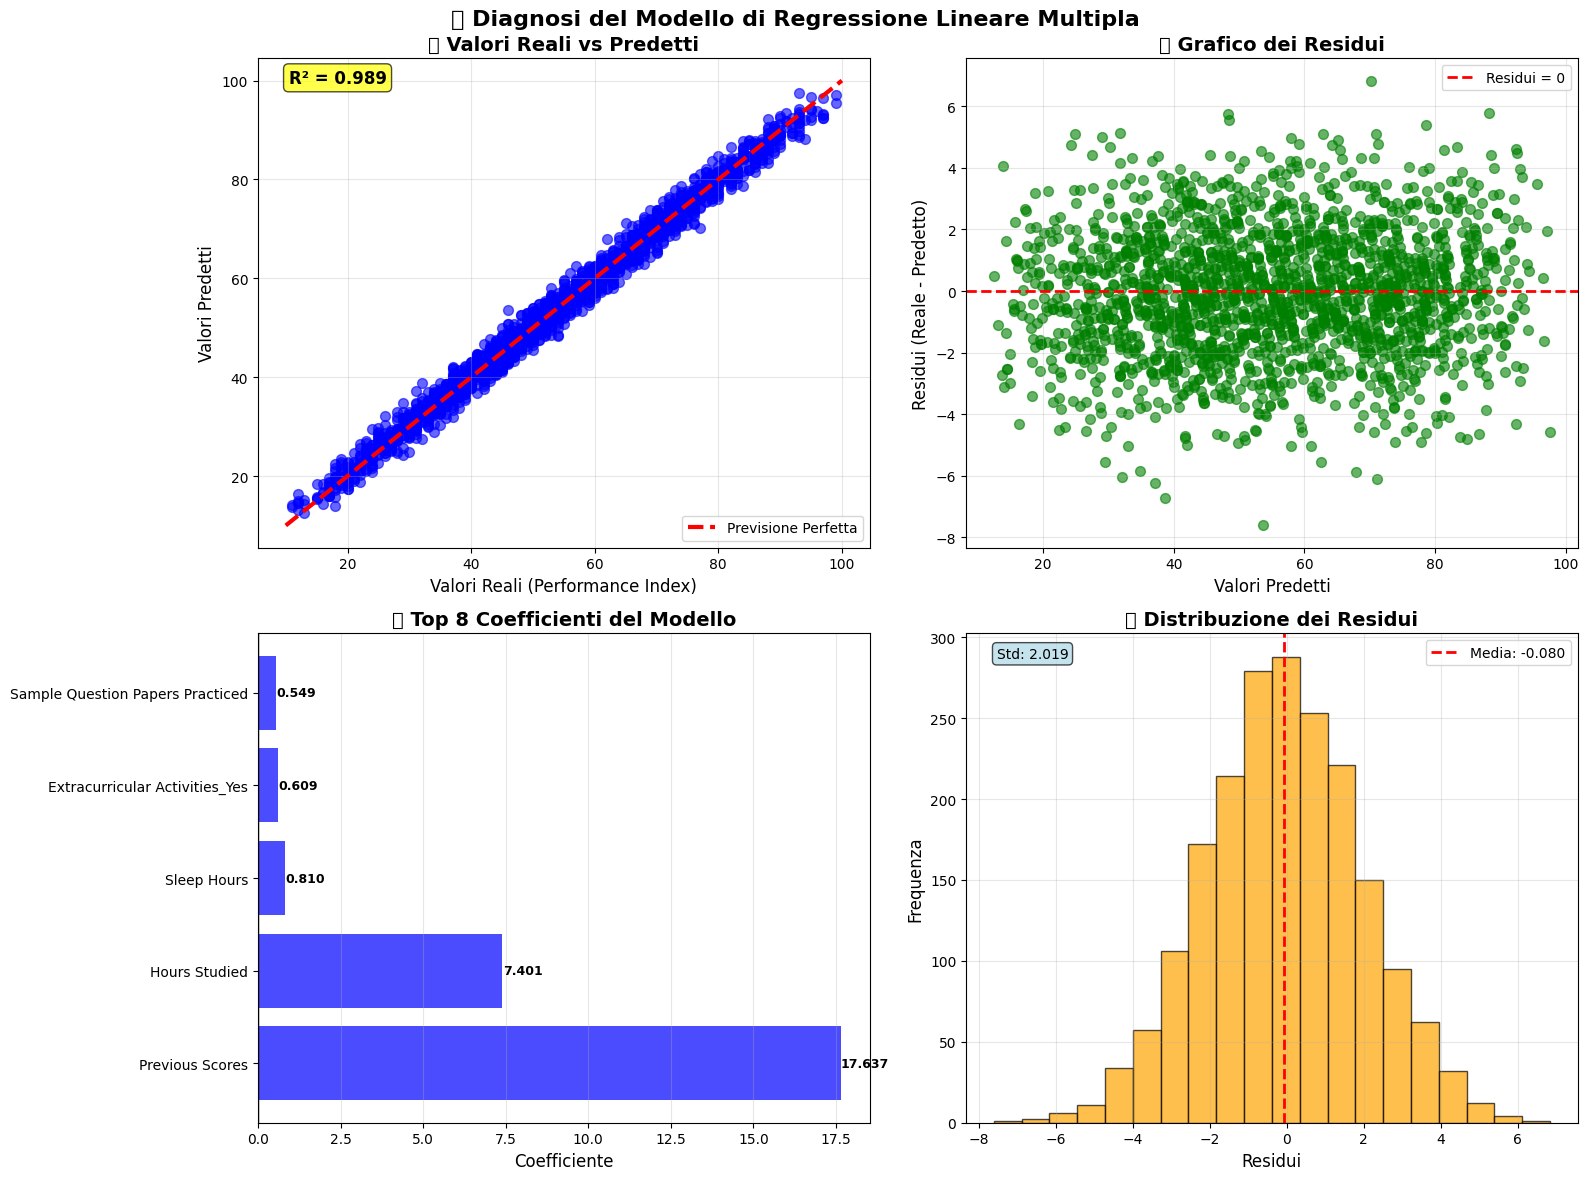


🔍 INTERPRETAZIONE DEI GRAFICI:
📊 GRAFICO 1 - Valori Reali vs Predetti:
   ✅ Punti molto vicini alla linea rossa = ottime previsioni

📉 GRAFICO 2 - Residui:
   ✅ Residui centrati sullo zero = nessun bias sistematico

📊 GRAFICO 3 - Importanza Variabili:
   🏆 Variabile più importante: Previous Scores
   📈 Coefficienti positivi (blu) aumentano la performance
   📉 Coefficienti negativi (rossi) diminuiscono la performance

📋 GRAFICO 4 - Distribuzione Residui:
   ✅ Distribuzione simmetrica = assunzioni del modello rispettate

📝 RIASSUNTO DIAGNOSTICO:
   • Media residui: -0.080 (dovrebbe essere ~0)
   • Std residui: 2.019
   • R² test: 0.989
   • Modello adeguato


In [13]:
print("📊 VISUALIZZAZIONI E DIAGNOSI DEL MODELLO")
print("="*60)

# Creiamo una figura con 4 sottografici per la diagnosi del modello
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🔍 Diagnosi del Modello di Regressione Lineare Multipla', fontsize=16, fontweight='bold')

# Calcoliamo i residui per l'analisi
residuals = y_test - y_test_pred

# 1. GRAFICO: VALORI REALI vs PREDETTI
axes[0,0].scatter(y_test, y_test_pred, alpha=0.6, color='blue', s=50)
# Linea perfetta (previsioni = valori reali)
min_val, max_val = y.min(), y.max()
axes[0,0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=3, label='Previsione Perfetta')
axes[0,0].set_xlabel('Valori Reali (Performance Index)', fontsize=12)
axes[0,0].set_ylabel('Valori Predetti', fontsize=12)
axes[0,0].set_title('🎯 Valori Reali vs Predetti', fontsize=14, fontweight='bold')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].legend()

# Aggiungiamo l'R² nel grafico
axes[0,0].text(0.05, 0.95, f'R² = {r2_test:.3f}', transform=axes[0,0].transAxes, 
               bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
               fontsize=12, fontweight='bold')

# 2. GRAFICO: RESIDUI vs VALORI PREDETTI
axes[0,1].scatter(y_test_pred, residuals, alpha=0.6, color='green', s=50)
axes[0,1].axhline(y=0, color='red', linestyle='--', linewidth=2, label='Residui = 0')
axes[0,1].set_xlabel('Valori Predetti', fontsize=12)
axes[0,1].set_ylabel('Residui (Reale - Predetto)', fontsize=12)
axes[0,1].set_title('📉 Grafico dei Residui', fontsize=14, fontweight='bold')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].legend()

# 3. GRAFICO: IMPORTANZA DELLE VARIABILI (TOP 8)
top_features = coef_df.head(8)
colors = ['red' if coef < 0 else 'blue' for coef in top_features['Coefficiente']]
bars = axes[1,0].barh(range(len(top_features)), top_features['Coefficiente'], color=colors, alpha=0.7)
axes[1,0].set_yticks(range(len(top_features)))
axes[1,0].set_yticklabels(top_features['Feature_Pulita'], fontsize=10)
axes[1,0].set_xlabel('Coefficiente', fontsize=12)
axes[1,0].set_title('📊 Top 8 Coefficienti del Modello', fontsize=14, fontweight='bold')
axes[1,0].grid(True, alpha=0.3, axis='x')
axes[1,0].axvline(x=0, color='black', linewidth=1)

# Aggiungiamo i valori sulle barre
for i, (bar, coef) in enumerate(zip(bars, top_features['Coefficiente'])):
    width = bar.get_width()
    label_x = width + 0.01 if width >= 0 else width - 0.01
    ha = 'left' if width >= 0 else 'right'
    axes[1,0].text(label_x, bar.get_y() + bar.get_height()/2, f'{coef:.3f}', 
                   ha=ha, va='center', fontsize=9, fontweight='bold')

# 4. GRAFICO: DISTRIBUZIONE DEI RESIDUI
axes[1,1].hist(residuals, bins=20, alpha=0.7, color='orange', edgecolor='black')
axes[1,1].set_xlabel('Residui', fontsize=12)
axes[1,1].set_ylabel('Frequenza', fontsize=12)
axes[1,1].set_title('📋 Distribuzione dei Residui', fontsize=14, fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

# Aggiungiamo statistiche sui residui
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)
axes[1,1].axvline(mean_residuals, color='red', linestyle='--', linewidth=2, 
                  label=f'Media: {mean_residuals:.3f}')
axes[1,1].text(0.05, 0.95, f'Std: {std_residuals:.3f}', transform=axes[1,1].transAxes,
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7),
               fontsize=10)
axes[1,1].legend()

plt.tight_layout()
plt.show()

# INTERPRETAZIONE DEI GRAFICI
print("\n🔍 INTERPRETAZIONE DEI GRAFICI:")
print("="*50)

print(f"📊 GRAFICO 1 - Valori Reali vs Predetti:")
if r2_test > 0.8:
    print(f"   ✅ Punti molto vicini alla linea rossa = ottime previsioni")
elif r2_test > 0.6:
    print(f"   👍 Buona distribuzione attorno alla linea rossa")
else:
    print(f"   ⚠️  Punti sparsi = previsioni poco accurate")

print(f"\n📉 GRAFICO 2 - Residui:")
if abs(np.mean(residuals)) < 0.5:
    print(f"   ✅ Residui centrati sullo zero = nessun bias sistematico")
else:
    print(f"   ⚠️  Residui non centrati = possibile bias nel modello")

print(f"\n📊 GRAFICO 3 - Importanza Variabili:")
top_var = coef_df.iloc[0]['Feature_Pulita']
print(f"   🏆 Variabile più importante: {top_var}")
print(f"   📈 Coefficienti positivi (blu) aumentano la performance")
print(f"   📉 Coefficienti negativi (rossi) diminuiscono la performance")

print(f"\n📋 GRAFICO 4 - Distribuzione Residui:")
if abs(mean_residuals) < std_residuals/3:
    print(f"   ✅ Distribuzione simmetrica = assunzioni del modello rispettate")
else:
    print(f"   ⚠️  Distribuzione asimmetrica = possibili violazioni assunzioni")

print(f"\n📝 RIASSUNTO DIAGNOSTICO:")
print(f"   • Media residui: {mean_residuals:.3f} (dovrebbe essere ~0)")
print(f"   • Std residui: {std_residuals:.3f}")
print(f"   • R² test: {r2_test:.3f}")
print(f"   • Modello {'adeguato' if r2_test > 0.6 else 'da migliorare'}")

## 🎓 Conclusioni e Riassunto della Lezione

### 📋 Cosa Abbiamo Imparato:

**1. 🔍 Analisi Esplorativa dei Dati**
- Come esplorare e comprendere un dataset
- Identificare correlazioni tra variabili
- Visualizzare distribuzioni e relazioni

**2. 🛠️ Preprocessing dei Dati**
- Separare target e features
- Gestire variabili categoriche (OneHot Encoding)
- Standardizzare variabili numeriche (StandardScaler)

**3. 🚀 Machine Learning Pipeline**
- Costruire una pipeline automatica
- Dividere dati in train/test
- Addestrare un modello di regressione lineare multipla

**4. 📊 Valutazione del Modello**
- Metriche: R², MAE, RMSE
- Interpretare la bontà delle previsioni
- Riconoscere overfitting

**5. 🔬 Interpretazione dei Risultati**
- Analizzare coefficienti e loro significato
- Identificare variabili più importanti
- Diagnosticare il modello con visualizzazioni

### 🧠 Concetti Chiave da Ricordare:

> **Regressione Lineare Multipla**: Prevede valori continui usando più variabili predittive

> **Pipeline**: Automatizza preprocessing e modelling per evitare errori

> **Train/Test Split**: Essenziale per valutare la capacità di generalizzazione

> **Coefficienti**: Indicano l'impatto di ogni variabile sulla previsione

### 🚀 Prossimi Passi:

- **Migliorare il modello**: Feature engineering, polinomiali, regolarizzazione
- **Altri algoritmi**: Random Forest, SVM, Neural Networks
- **Validazione robusta**: Cross-validation, metriche multiple
- **Deploy**: Portare il modello in produzione

In [14]:
# 🎯 ESEMPIO PRATICO: Previsione per un Nuovo Studente
print("="*60)
print("🎯 ESEMPIO PRATICO: PREVISIONE PER UN NUOVO STUDENTE")
print("="*60)

# Creiamo un esempio di nuovo studente
nuovo_studente = pd.DataFrame({
    'Hours Studied': [7],                        # 7 ore di studio al giorno
    'Previous Scores': [85],                     # Punteggio precedente 85/100
    'Extracurricular Activities': ['Yes'],       # Partecipa ad attività extra
    'Sleep Hours': [8],                          # 8 ore di sonno
    'Sample Question Papers Practiced': [5]      # Ha fatto 5 test di pratica
})

print("📝 Caratteristiche del nuovo studente:")
display(nuovo_studente)

# Facciamo la previsione
previsione = model.predict(nuovo_studente)

print(f"\n🔮 PREVISIONE DEL MODELLO:")
print(f"   Performance Index prevista: {previsione[0]:.2f}/100")

# Calcoliamo un intervallo di confidenza approssimativo
intervallo = rmse_test * 1.96  # ~95% di confidenza
print(f"   Intervallo di confidenza (~95%): {previsione[0]-intervallo:.1f} - {previsione[0]+intervallo:.1f}")

# Interpretazione
if previsione[0] >= 90:
    performance_level = "🌟 Eccellente"
elif previsione[0] >= 80:
    performance_level = "👍 Molto Buona"
elif previsione[0] >= 70:
    performance_level = "✅ Buona"
elif previsione[0] >= 60:
    performance_level = "🤔 Sufficiente"
else:
    performance_level = "❌ Da Migliorare"

print(f"   Livello di performance: {performance_level}")

print(f"\n✅ ESERCIZIO COMPLETATO CON SUCCESSO!")
print(f"Hai imparato a costruire e utilizzare un modello di regressione lineare multipla!")
print("="*60)

🎯 ESEMPIO PRATICO: PREVISIONE PER UN NUOVO STUDENTE
📝 Caratteristiche del nuovo studente:


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,85,Yes,8,5



🔮 PREVISIONE DEL MODELLO:
   Performance Index prevista: 77.87/100
   Intervallo di confidenza (~95%): 73.9 - 81.8
   Livello di performance: ✅ Buona

✅ ESERCIZIO COMPLETATO CON SUCCESSO!
Hai imparato a costruire e utilizzare un modello di regressione lineare multipla!
